In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../reports/hip2/result_raw.csv')

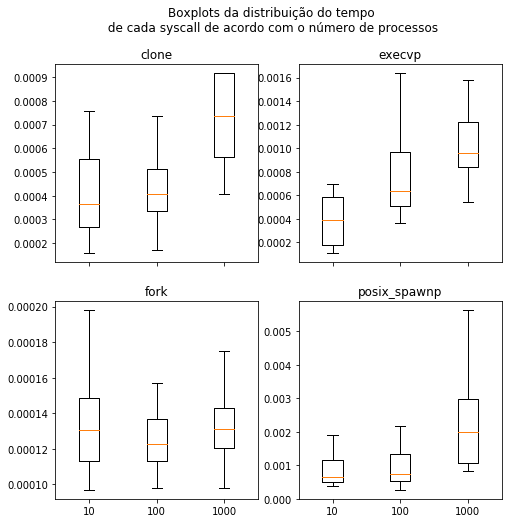

In [12]:
pltdata = {}

i = 10
for syscall in np.unique(data.syscall):
    pltdata[syscall] = []
    for depth in np.unique(data.depth):
        pltdata[syscall].append(data.loc[(data['depth'] == depth) & (data['tool'] == 'strace') & (data['syscall'] == syscall)].time)
        i *= 10
        
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
axs[0][0].set_title('clone')
axs[0][0].boxplot(pltdata['clone'], labels=np.unique(data.depth), showfliers=False)
axs[0][1].set_title('execvp')
axs[0][1].boxplot(pltdata['execvp'], labels=np.unique(data.depth), showfliers=False)
axs[1][0].set_title('fork')
axs[1][0].boxplot(pltdata['fork'], labels=np.unique(data.depth), showfliers=False)
axs[1][1].set_title('posix_spawnp')
axs[1][1].boxplot(pltdata['posix_spawnp'], labels=np.unique(data.depth), showfliers=False)

fig.suptitle("Boxplots da distribuição do tempo\n de cada syscall de acordo com o número de processos")
plt.show()

In [2]:
df = pd.read_csv('../reports/hip2/result.csv')
df

,syscall,tool,depth,time
0,clone,perf,10,0.454000
1,clone,perf,100,0.399000
2,clone,perf,1000,0.395500
3,clone,strace,10,0.000365
4,clone,strace,100,0.000405
5,clone,strace,1000,0.000735
6,execvp,perf,10,0.000327
7,execvp,perf,100,0.000311
8,execvp,perf,1000,0.000320
9,execvp,strace,10,0.000391


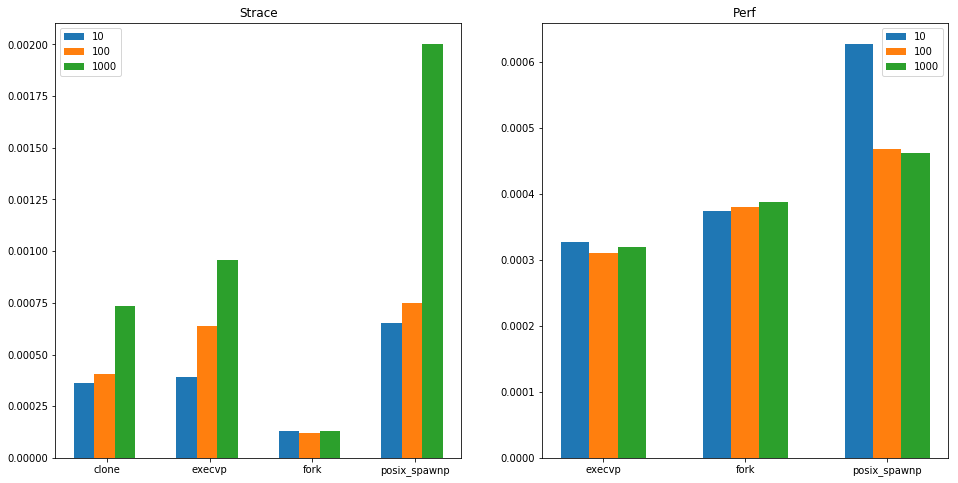

In [7]:
tools = np.unique(df['tool']) 
syscalls = df.loc[(df['depth'] == 10) & (df['tool'] == 'strace')].syscall
depths = np.unique(df['depth'])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

width = np.arange(4)
offset = 0.2
count = 0.0

for dep in depths:
    data = df.loc[(df['depth'] == dep) & (df['tool'] == 'strace')].time
    ax[0].bar(width + count, data, offset, label=dep)
    count += offset
    
ax[0].legend()
ax[0].set_title('Strace')
ax[0].set_xticks(width + offset + 0.1 / 4)
ax[0].set_xticklabels(syscalls)

width = np.arange(3)

for dep in depths:
    data = df.loc[(df['depth'] == dep) & (df['tool'] == 'perf') & (df['syscall'] != 'clone')].time
    ax[1].bar(width + count, data, offset, label=dep)
    count += offset
    
ax[1].legend()
ax[1].set_title('Perf')
ax[1].set_xticks(width + offset + 1.8 / 3)
ax[1].set_xticklabels(syscalls[1:])

plt.show()